In [48]:
# Imported Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from figure_labeler import *

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')


<h1 style="text-align:center;">Healthcare Insurance</h1>
<hr>

<a name="top"></a>
#### This is a Sample of Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
***


The dataset provides information on personal attributes, geographic factors, and medical insurance charges, with a focus on understanding how smoking influences insurance costs. By analyzing the distribution of smokers and non-smokers and comparing their average insurance charges, we aim to identify the impact of smoking on healthcare expenses. Additionally, predictive modeling can be employed to estimate insurance costs based on smoking status and other variables, facilitating better risk assessment for insurance companies. Ultimately, this analysis aims to offer insights that can inform more accurate pricing strategies and risk management practices in the insurance industry.

- Age: The insured person's age.
- Sex: Gender (male or female) of the insured.
- BMI (Body Mass Index): A measure of body fat based on height and weight.
- Children: The number of dependents covered.
- Smoker: Whether the insured is a smoker (yes or no).
- Charges: The medical insurance costs incurred by the insured person.



[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***

One of the primary questions driving this study is: "Does being a smoker impact the amount we pay for medical insurance?" This inquiry is the cornerstone of our investigation into the multifaceted relationships between various factors and the resulting medical insurance charges.

The study aims to analyze how smoking status, among other factors such as age, gender, Body Mass Index (BMI), number of children, and geographic region, influences the costs individuals incur for medical insurance. By employing multivariate analysis techniques, we seek to unravel the specific impact of smoking on insurance charges and understand how it interacts with other demographic and lifestyle variables.

Through this research, we will provide insights that can inform individuals and insurance providers about the significant role smoking plays in determining medical insurance premiums. Understanding this impact can aid in making more informed decisions about insurance coverage, potentially leading to cost savings for non-smokers and more accurate risk assessments for insurers.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
***

One of the primary questions driving this study is: "Does being a smoker impact the amount we pay for medical insurance?" This inquiry is the cornerstone of our investigation into the multifaceted relationships between various factors and the resulting medical insurance charges.

The study aims to analyze how smoking status, among other factors such as age, gender, Body Mass Index (BMI), number of children, and geographic region, influences the costs individuals incur for medical insurance. By employing multivariate analysis techniques, we seek to unravel the specific impact of smoking on insurance charges and understand how it interacts with other demographic and lifestyle variables.

Through this research, we will provide insights that can inform individuals and insurance providers about the significant role smoking plays in determining medical insurance premiums. Understanding this impact can aid in making more informed decisions about insurance coverage, potentially leading to cost savings for non-smokers and more accurate risk assessments for insurers.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
***

https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance


This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

[ref]: #top
[Back to Table of Contents][ref]

In [27]:
df = pd.read_csv('insurance.csv')

<a name="dat_prep"></a>
## Data Preprocessing
***


[ref]: #top
[Back to Table of Contents][ref]

Display the first few rows

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Count the number of missing values

In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Count the number of duplicate rows

In [30]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool>

<a name="dat_expl"></a>
## Data Exploration
***

Insert your data exploration here

[ref]: #top
[Back to Table of Contents][ref]

# Distribution of numerical variables

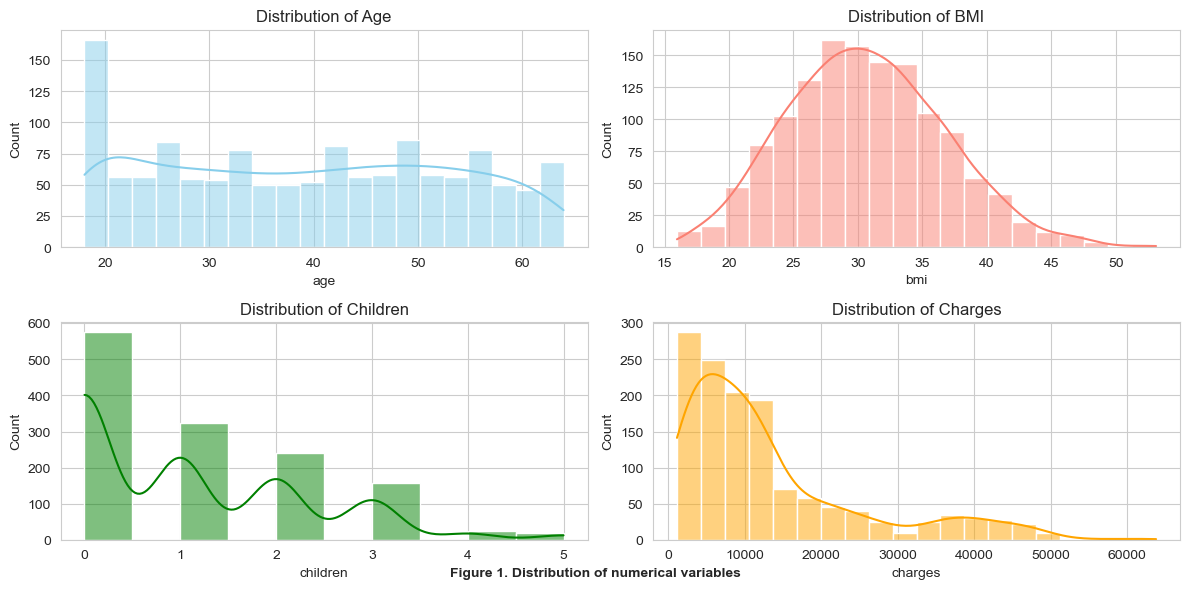

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=20, kde=True, color='salmon')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 3)
sns.histplot(df['children'], bins=10, kde=True, color='green')
plt.title('Distribution of Children')

plt.subplot(2, 2, 4)
sns.histplot(df['charges'], bins=20, kde=True, color='orange')
plt.title('Distribution of Charges')

plt.tight_layout()

# Incorporating fig_caption
plt.figtext(0.5, 0.01, "Figure 1. Distribution of numerical variables\n", wrap=True, horizontalalignment='center', fontsize=10, fontweight='bold')


plt.show()

# Relationship between numerical variables

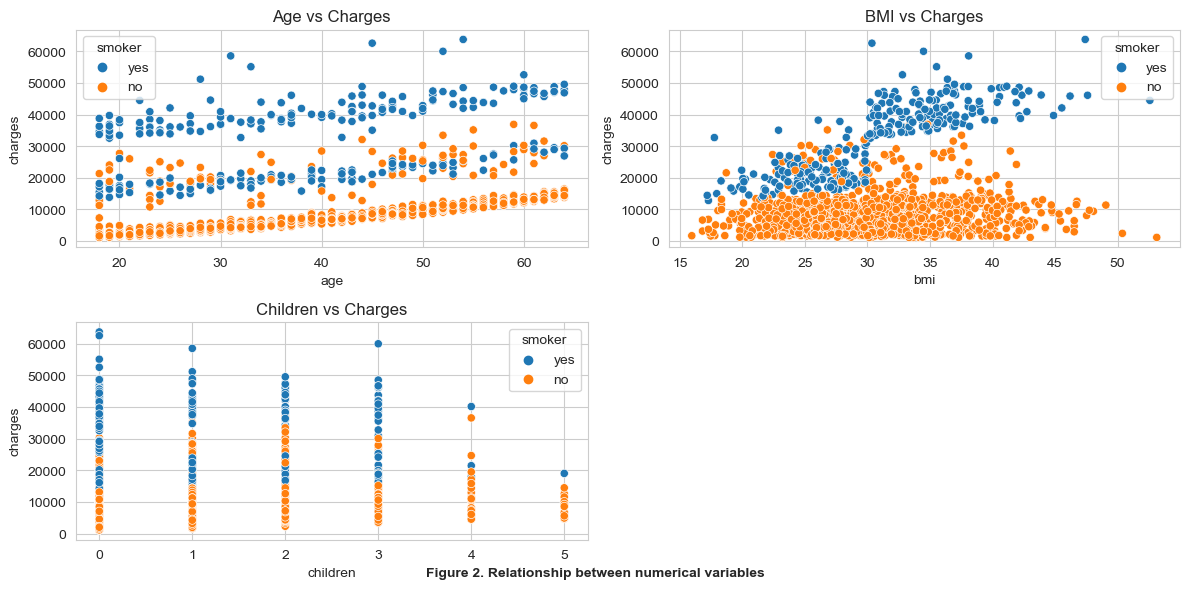

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('Age vs Charges')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('BMI vs Charges')

plt.subplot(2, 2, 3)
sns.scatterplot(x='children', y='charges', data=df, hue='smoker')
plt.title('Children vs Charges')

plt.tight_layout()

# Adding the fig_caption
plt.figtext(0.5, 0.01, "Figure 2. Relationship between numerical variables\n", wrap=True, horizontalalignment='center', fontsize=10, fontweight='bold')


plt.show()

# Relationship between categorical variables

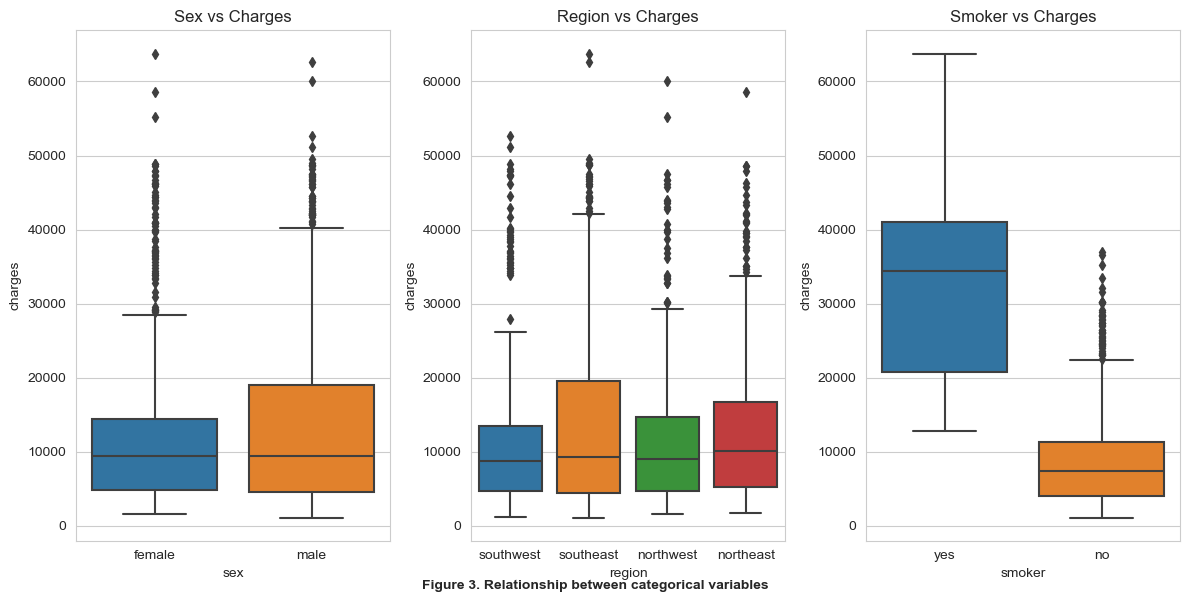

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')

plt.subplot(1, 3, 2)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')

plt.subplot(1, 3, 3)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')

plt.tight_layout()

plt.figtext(0.5,
            0.01,
            "Figure 3. Relationship between categorical variables",
            wrap=True,
            horizontalalignment='center',
            fontsize=10,
            fontweight='bold')


plt.show()



<a name="res_dis"></a>
## Results and Discussions
***

*Results and Discussion: Factors Influencing Insurance Charges*

The analysis of factors influencing insurance charges reveals compelling insights into the financial implications of age, gender, BMI, number of children, and smoking status. These findings are pivotal for individuals seeking to understand how these factors impact the amount they pay for insurance coverage.

*Age:*
Age exhibits a clear positive correlation with insurance charges, indicating that as individuals grow older, their insurance costs increase. This trend aligns with the expected notion that older individuals typically require more healthcare services, hence higher insurance charges.

*Gender:*
Gender does not show a significant impact on insurance charges in this analysis. Both males and females appear to have similar insurance costs on average, suggesting that gender may not be a decisive factor in determining insurance premiums.

*BMI:*
Body Mass Index (BMI) demonstrates a positive correlation with insurance charges, implying that individuals with higher BMIs tend to face higher insurance costs. This association likely reflects the increased health risks and medical needs often associated with higher BMI values.

*Number of Children:*
The analysis reveals a slight positive trend between the number of children and insurance charges. Individuals with more dependents may incur higher insurance costs, possibly due to increased family healthcare needs.

*Smoking Status:*
Perhaps the most notable finding is the substantial impact of smoking on insurance charges. Smokers consistently face significantly higher costs compared to non-smokers across all age groups and BMI values. This underscores the financial repercussions of smoking on insurance premiums, likely due to the elevated health risks associated with smoking.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
***

*Conclusion:*
In conclusion, this study highlights the significant influence of various factors on insurance charges. Age, BMI, and smoking status emerge as particularly impactful, with smokers facing notably higher costs. Understanding these relationships is crucial for individuals aiming to optimize their insurance coverage and for insurers to accurately assess risk factors. By considering these findings, individuals can make informed decisions to potentially reduce their insurance costs, especially by avoiding smoking. This study contributes valuable insights into the nuanced interplay between demographic and lifestyle factors and insurance charges, empowering individuals and insurers with data-driven knowledge.



[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

Insert your references here

[ref]: #top
[Back to Table of Contents][ref]

Gibin, W. O., & Collaborator. (n.d.). Healthcare Insurance. Retrieved from https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance